# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [219]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [222]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [225]:
#from google.colab import drive
#drive.mount('/content/drive')

In [227]:
# loading data into a pandas dataframe
dataset = pd.read_csv("Loan_Modelling.csv")

In [229]:
# creating a copy of the data
data = dataset.copy()

## Data Overview

* Observations
* Sanity checks

Viewing the first and last 5 rows of the dataset

In [234]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [236]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Checking the shape of the dataset.**

In [239]:
data.shape

(5000, 14)



*  The dataset has 5000 rows and 14 columns.




**Checking the shape of the dataset**

**Checking the attribute types**

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB




*   There are 14 numerical variables in the data.



*   All categorical variables are encoded by default.



**Checking the statistical summary**

In [250]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0




*   The average age is about 45 years, range is 23 to 67.
*   Min Family size is 1 and Max is 4
*   Mean income is ~ $77.77
*   Most of them don't have personal loans, securities accounts and CD
     accounts
*  Average work experience is about 20 years
*  There is a negative minimum value(-3) for experience, which might need further investigation.


**Checking for missing values**

In [254]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64



*   There are no missing values in the dataset.












In [257]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

## Data Preprocessing

In [261]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [263]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3], dtype=int64)

In [265]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [267]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [269]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [271]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
"ZIPCode"
]
data[cat_cols] = data[cat_cols].astype('category')

In [273]:
# checking first 5 rows
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91,4,1.0,2,0,0,0,0,0,1


In [275]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.8 KB




*   There are 7 numerical variables and 7 categorical variables




## Exploratory Data Analysis.



- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Univariate Analysis**

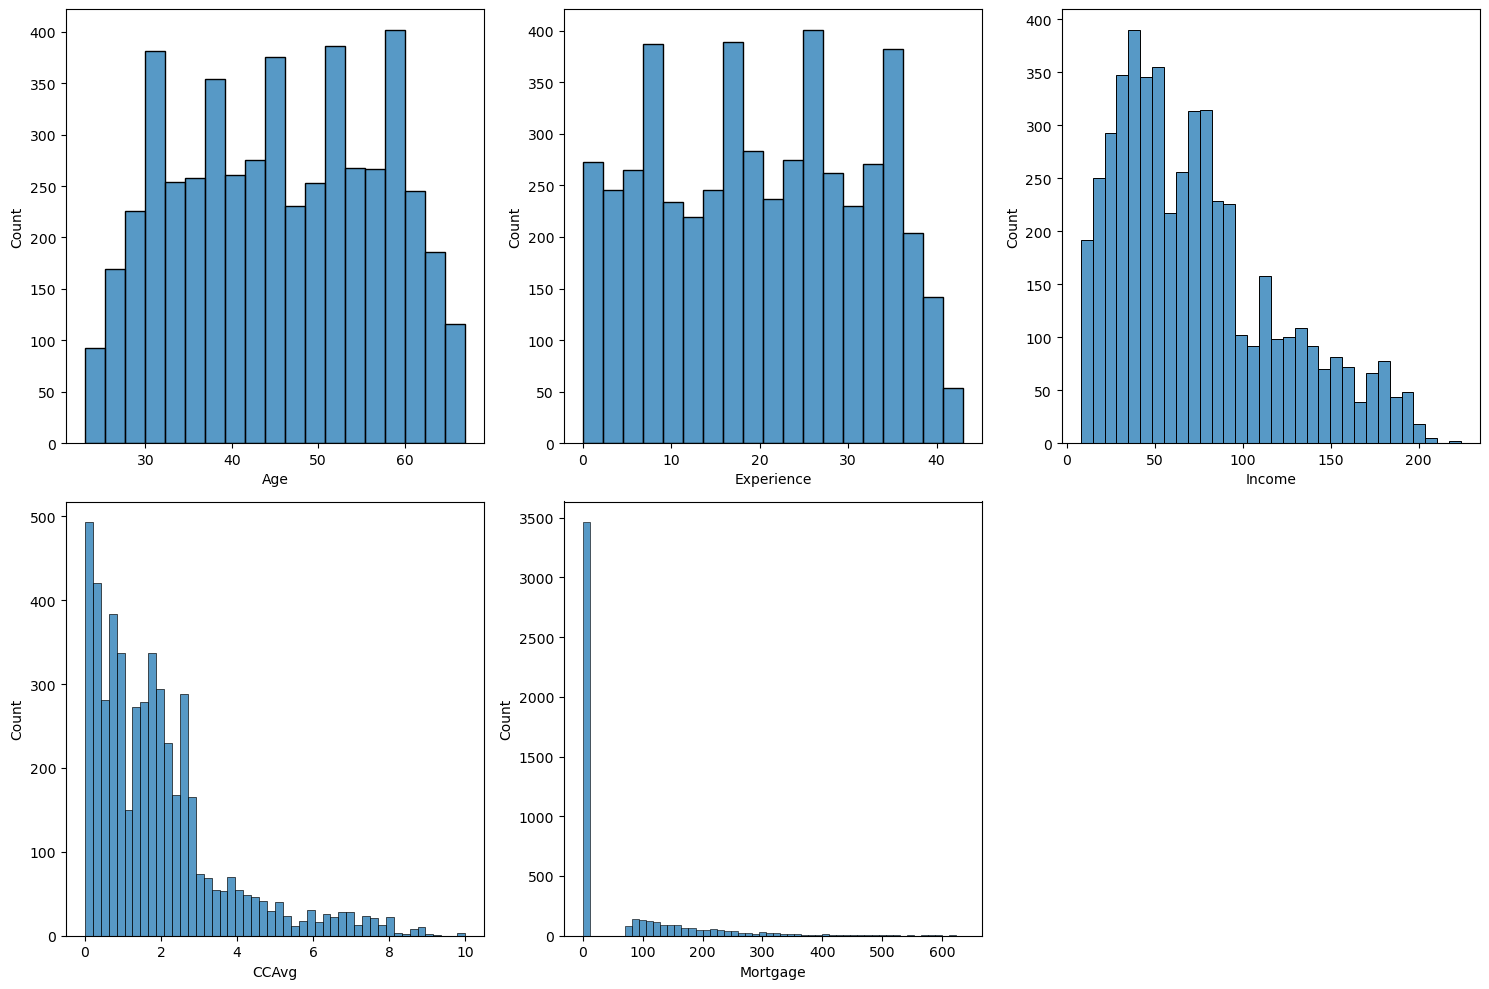

In [281]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age', 'Experience', 'Income', 'CCAvg','Mortgage']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram
plt.tight_layout()
plt.show()




*  Insights from the above plots

* Age: The age distribution is almost a uniform distribution with customers aged between 25 to 65.
* Experience: The experience distribution is also close to uniform distribution, with experience ranging from 0 to 40 years. Also, there are some outliers with experience less than 0.
* Income: The income distribution is right-skewed, with majority of customers having income between 40k to 80k. There are some outliers with very high income.
* CCAvg: The credit card spending is also right-skewed, with majority of customers spending less than 2k per month. There are some outliers with very high spending.
* Mortgage: Most of the customers don't have a mortgage. For the customers having a mortage, the distribution is right-skewed with a few outliers having very high mortgage values.




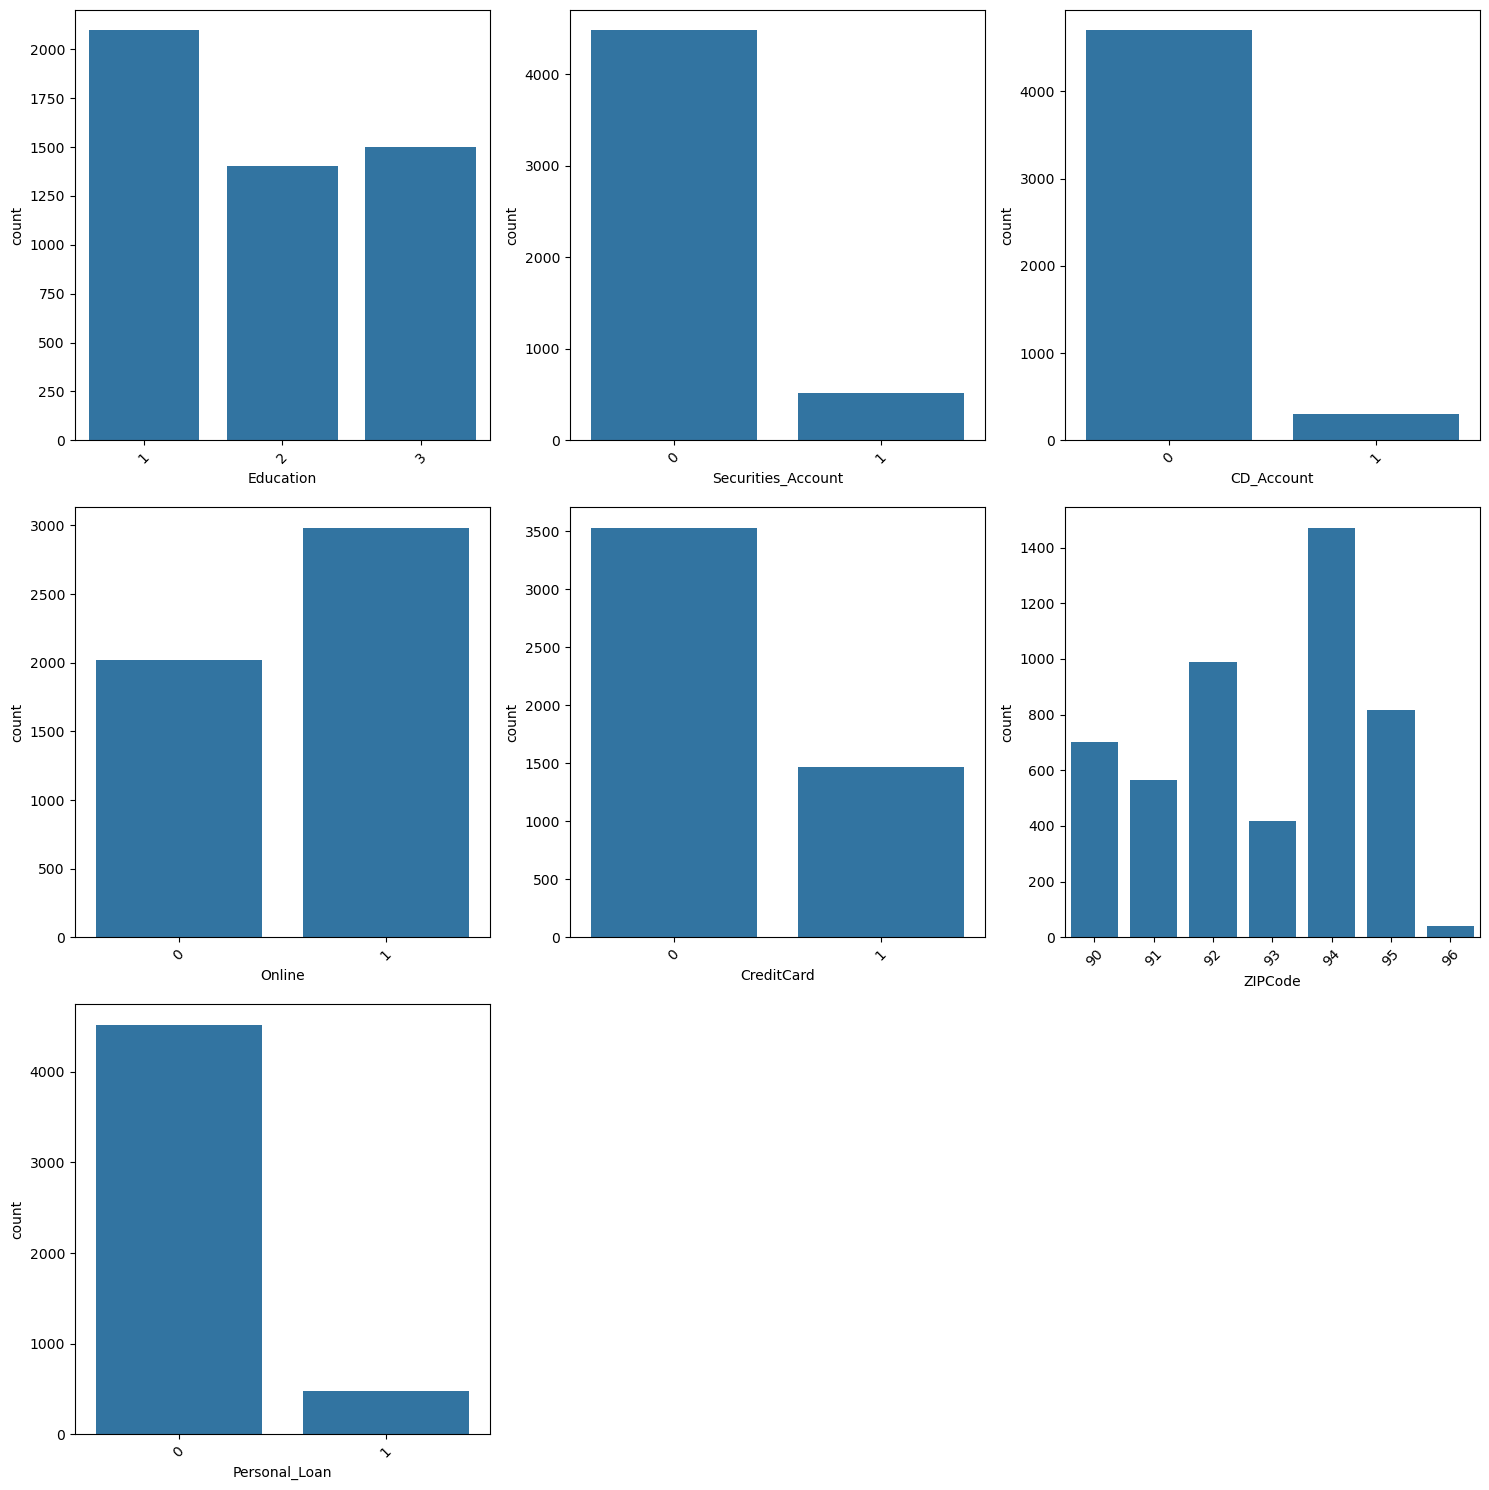

In [283]:
# defining the figure size
plt.figure(figsize=(15, 15))

# defining the list of categorical features to plot
cat_features = ['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode', 'Personal_Loan']

# plotting the countplot for each categorical feature
for i, feature in enumerate(cat_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.countplot(data=data, x=feature)    # plot the countplot
    plt.xticks(rotation=45)   # rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




*  Insights from the above plots

*  Education: Majority of the customers are Undergraduates.
*  Securities Account: Very few customers have a securities account with the bank.
*  CD Account: Very few customers have a certificate of deposit account with the bank.
*  Online: Most of the customers use internet banking facilities.
*  Credit Card: Most of the customers don't use a credit card issued by the bank.
*  ZIP Code: The distribution of customers across different ZIP Codes is almost uniform.
*  Personal Loan: Very few customers accepted the personal loan offered in the last campaign.






### Bivariate Analysis

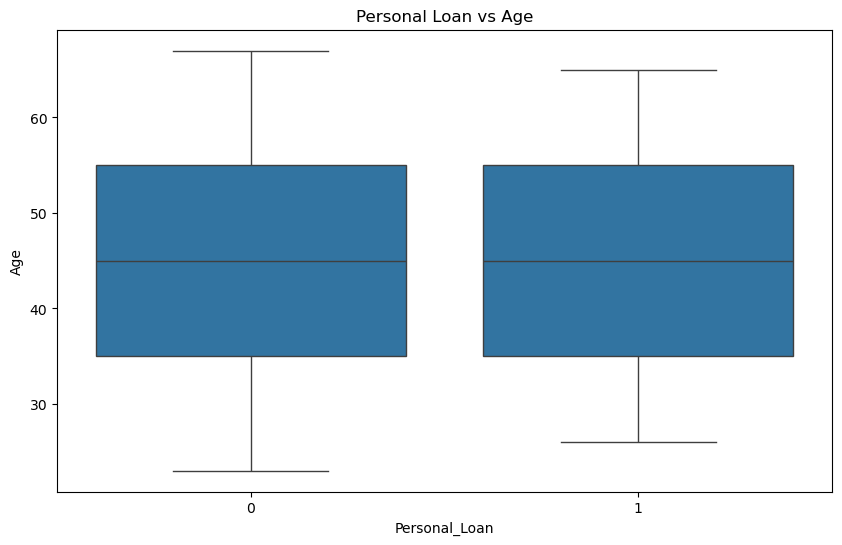

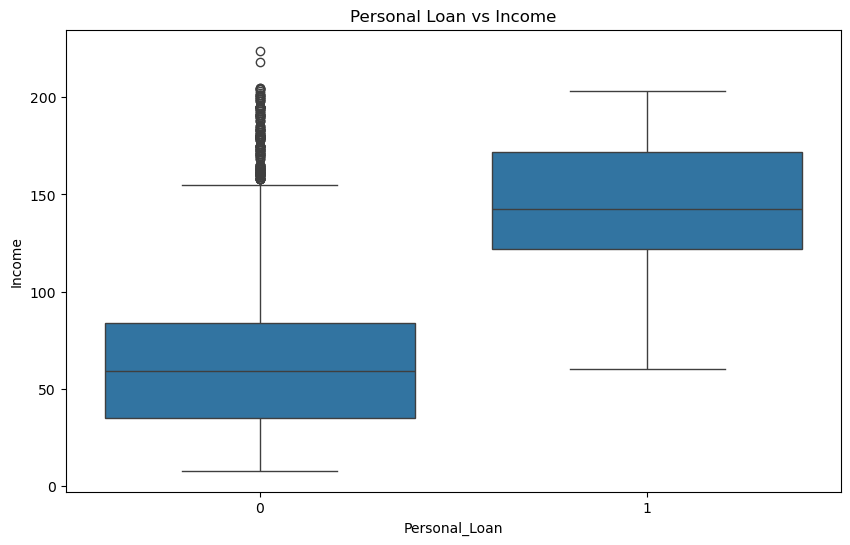

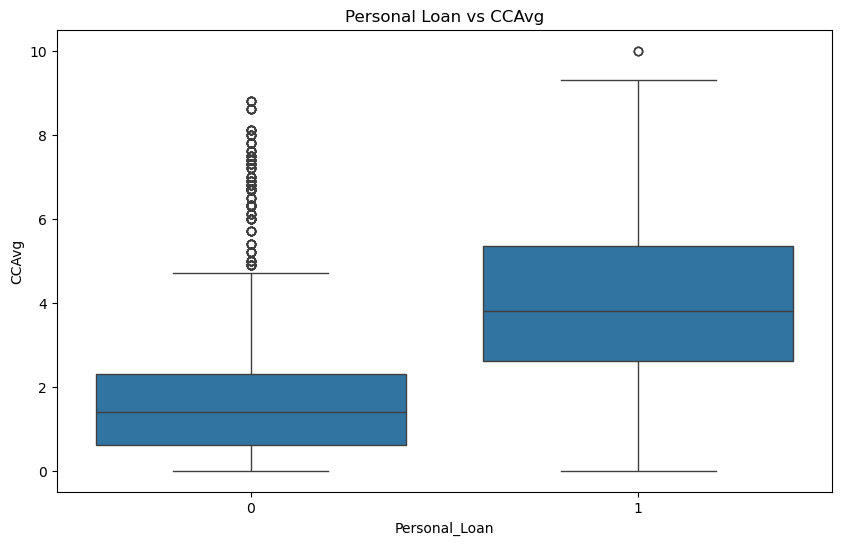

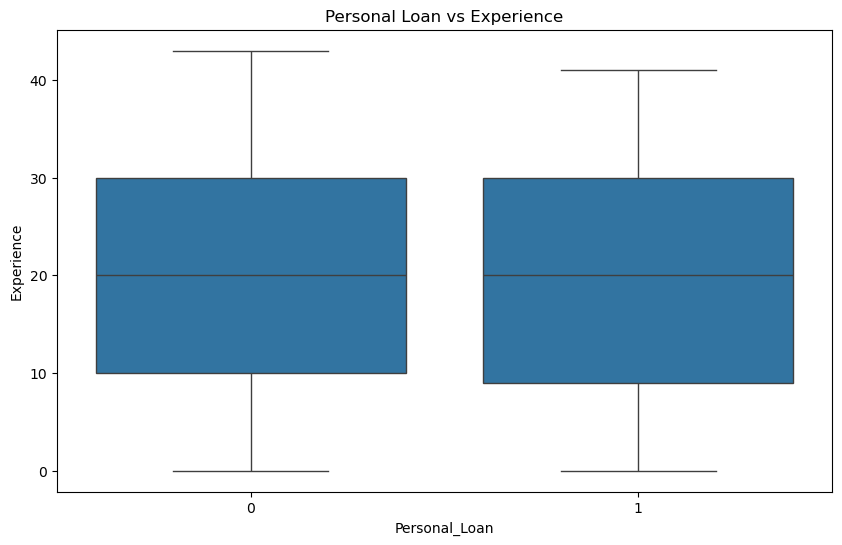

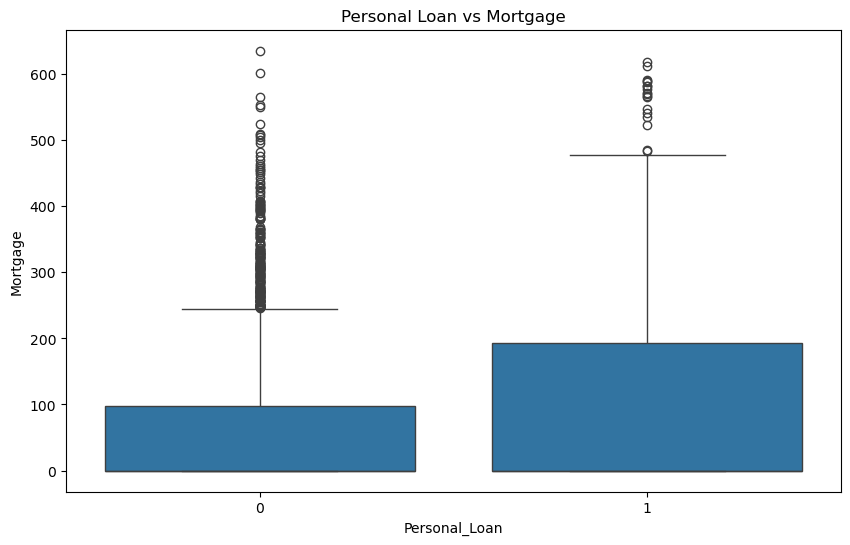

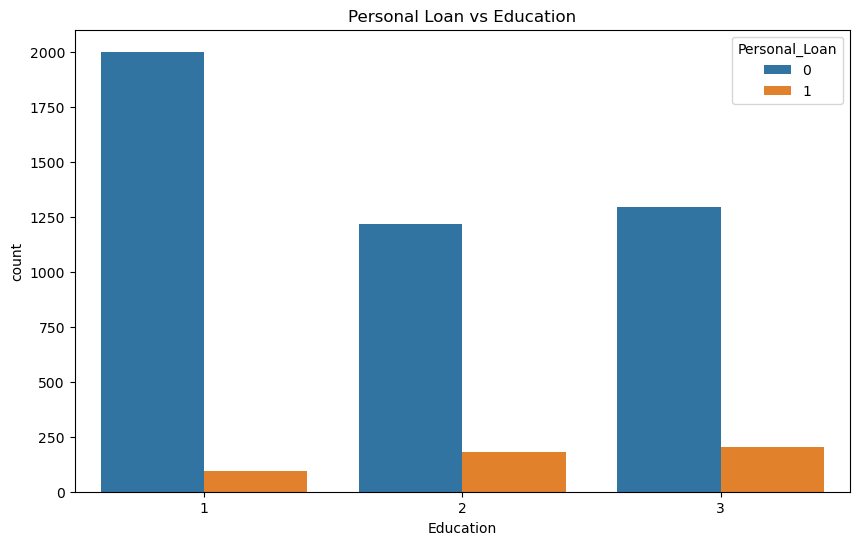

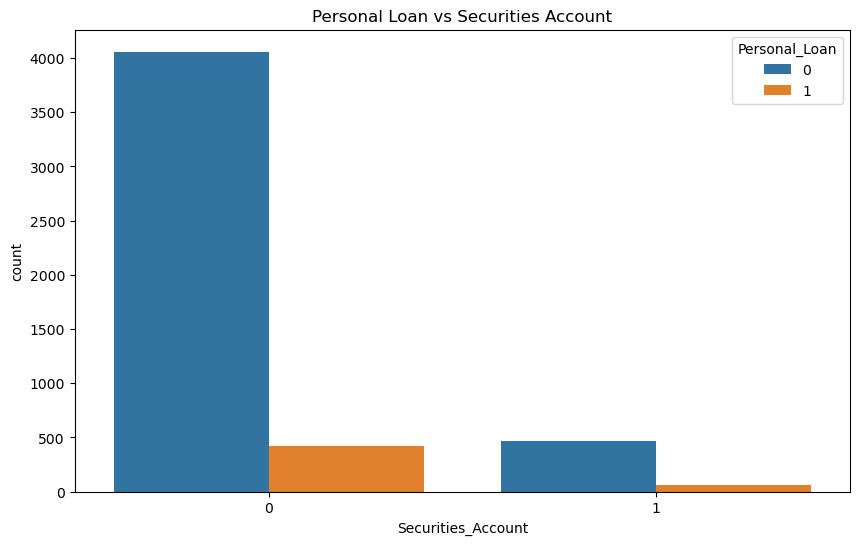

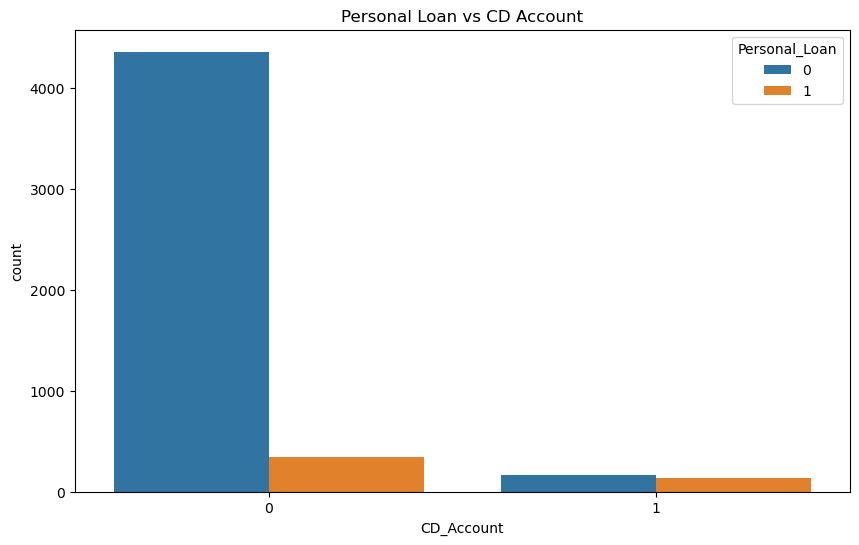

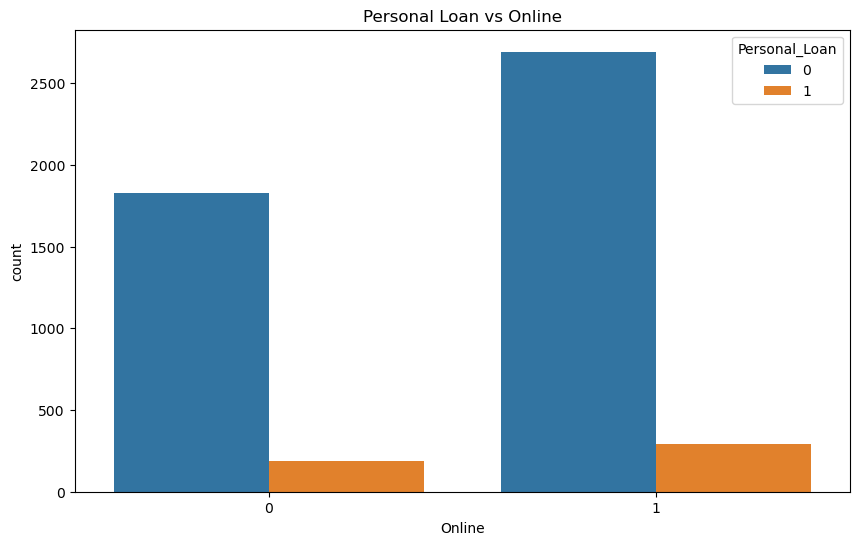

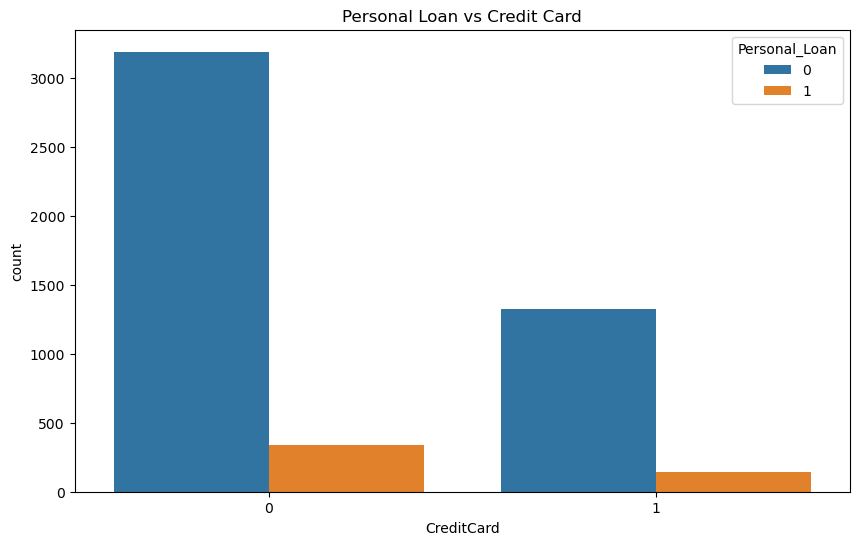

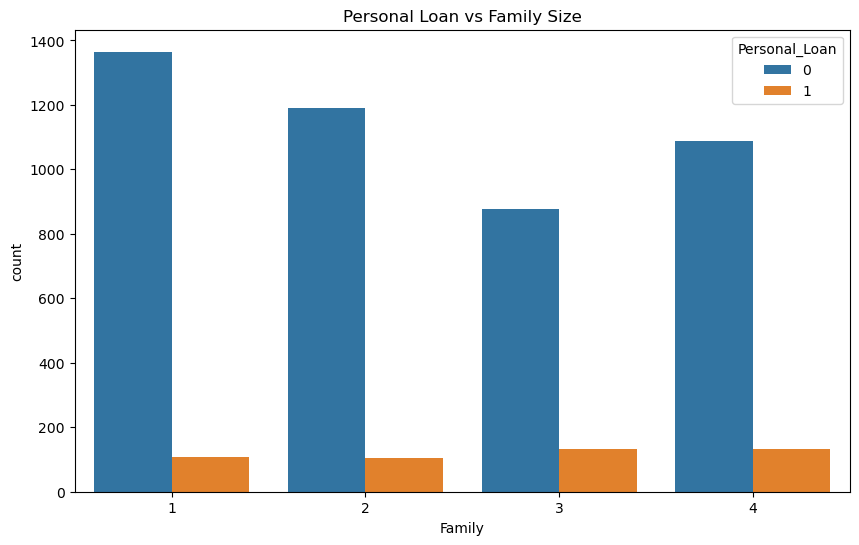

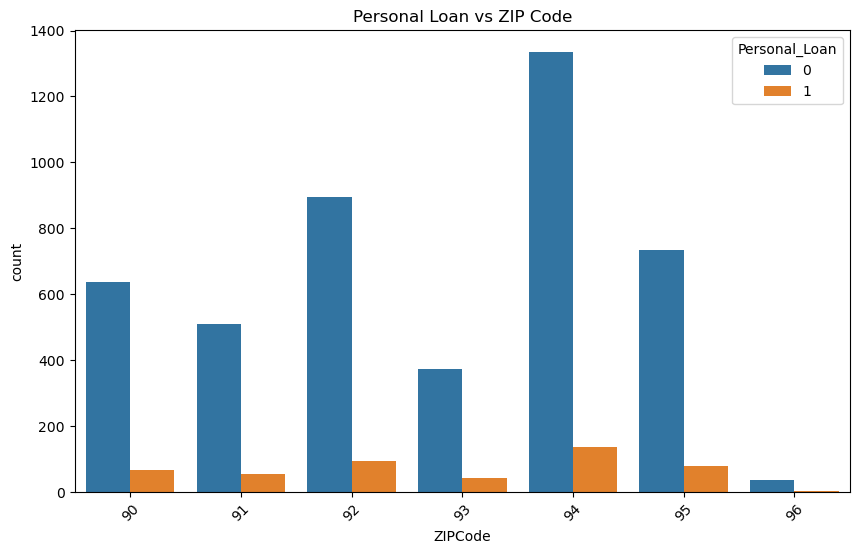

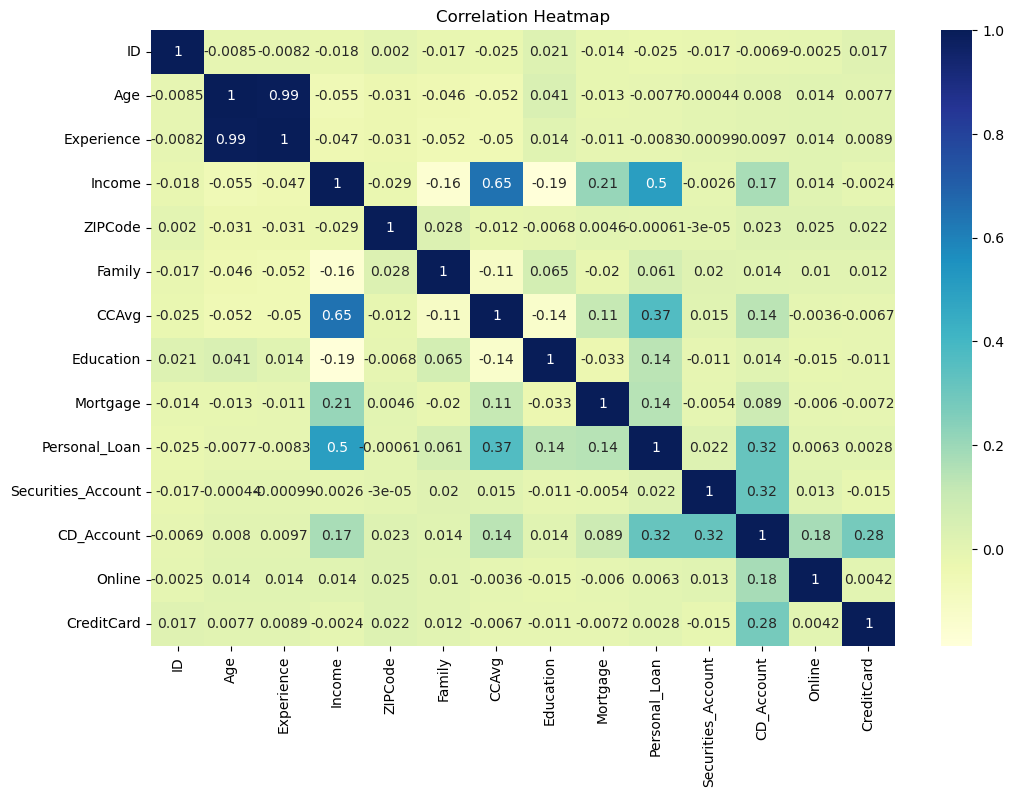

In [286]:
# Relation between Personal Loan and Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Personal_Loan", y="Age")
plt.title("Personal Loan vs Age")
plt.show()

# Relation between Personal Loan and Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Personal_Loan", y="Income")
plt.title("Personal Loan vs Income")
plt.show()

# Relation between Personal Loan and CCAvg
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Personal_Loan", y="CCAvg")
plt.title("Personal Loan vs CCAvg")
plt.show()

# Relation between Personal Loan and Experience
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Personal_Loan", y="Experience")
plt.title("Personal Loan vs Experience")
plt.show()

# Relation between Personal Loan and Mortgage
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Personal_Loan", y="Mortgage")
plt.title("Personal Loan vs Mortgage")
plt.show()

# Relation between Personal Loan and Education
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Education", hue="Personal_Loan")
plt.title("Personal Loan vs Education")
plt.show()

# Relation between Personal Loan and Securities Account
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Securities_Account", hue="Personal_Loan")
plt.title("Personal Loan vs Securities Account")
plt.show()

# Relation between Personal Loan and CD Account
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="CD_Account", hue="Personal_Loan")
plt.title("Personal Loan vs CD Account")
plt.show()

# Relation between Personal Loan and Online
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Online", hue="Personal_Loan")
plt.title("Personal Loan vs Online")
plt.show()

# Relation between Personal Loan and Credit Card
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="CreditCard", hue="Personal_Loan")
plt.title("Personal Loan vs Credit Card")
plt.show()

# Relation between Personal Loan and Family Size
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Family", hue="Personal_Loan")
plt.title("Personal Loan vs Family Size")
plt.show()

# Relation between Personal Loan and ZIP Code
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="ZIPCode", hue="Personal_Loan")
plt.title("Personal Loan vs ZIP Code")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()




 Insights from Bivariate Analysis:

*  Customers who accepted personal loans tend to have higher income, higher credit card spending, and higher mortgage values.
*  Customers with higher education levels are more likely to accept personal loans.
*  Customers with CD accounts are more likely to accept personal loans.
*  There is no clear relationship between personal loan acceptance and age, experience, securities account, online banking, credit card usage, family size, or ZIP code.
*  Income and CCAvg are positively correlated, indicating that customers with higher income tend to spend more on credit cards.
*  Age and Experience are positively correlated, as expected.






**Further Observations**

 comment on outliers

*  Income: There are some outliers with very high income.
*  CCAvg: There are some outliers with very high credit card spending.
*  Mortgage: There are a few outliers with very high mortgage values.



In [290]:
# Capping the outliers
for feature in ["Income", "CCAvg", "Mortgage"]:
    percentile99 = data[feature].quantile(0.99)
    data[feature] = np.where(data[feature] > percentile99, percentile99, data[feature])


**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

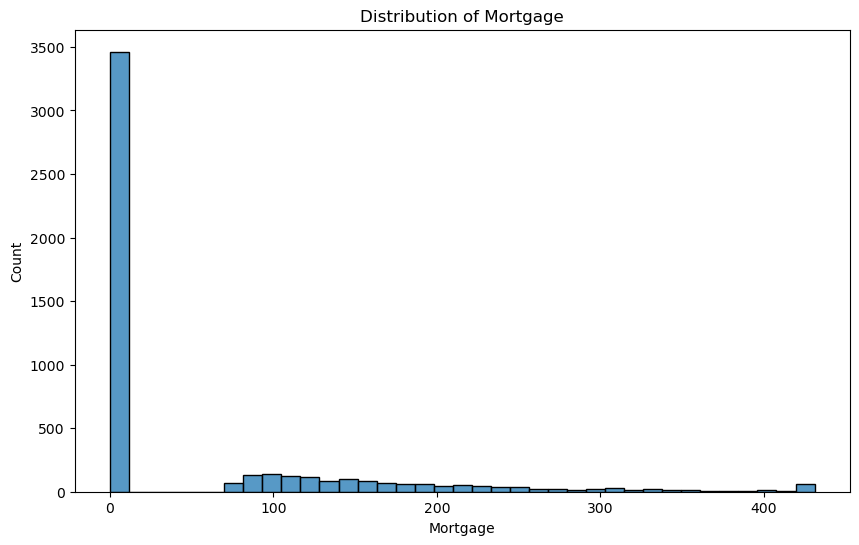

In [293]:
# What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Mortgage')
plt.title('Distribution of Mortgage')
plt.show()


* Most customers have zero mortgage. Among those who do, the distribution is right-skewed with a long tail.





In [295]:
# How many customers have credit cards?
num_credit_card_holders = data['CreditCard'].value_counts()[1] # Count the number of '1' (representing having a credit card)
print("Number of customers with credit cards:", num_credit_card_holders)

Number of customers with credit cards: 1470


What are the attributes that have a strong correlation with the target attribute (personal loan)?

*   Customers who accepted personal loans tend to have higher income, higher credit card spending, and higher mortgage values.




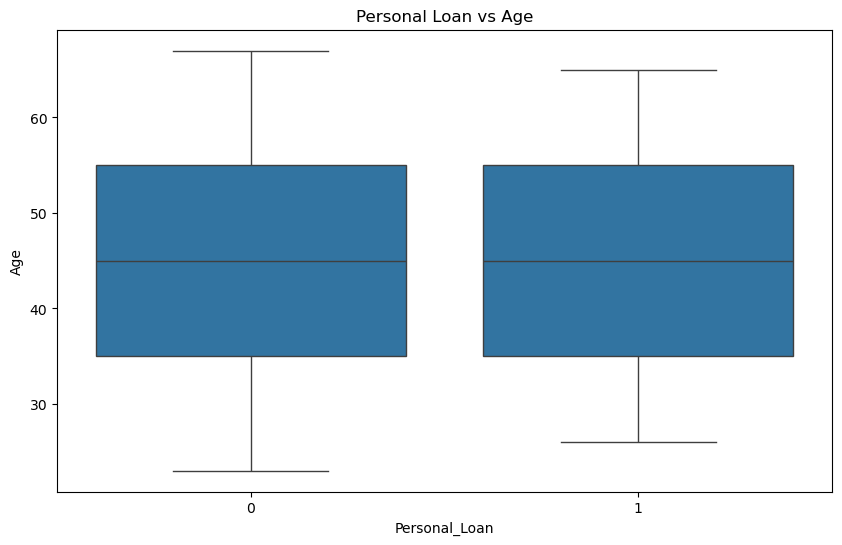

In [297]:
# How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Age')
plt.title('Personal Loan vs Age')
plt.show()


* There is no strong relationship between age and the likelihood of taking a personal loan, though the median age of those who took the loan is slightly higher.





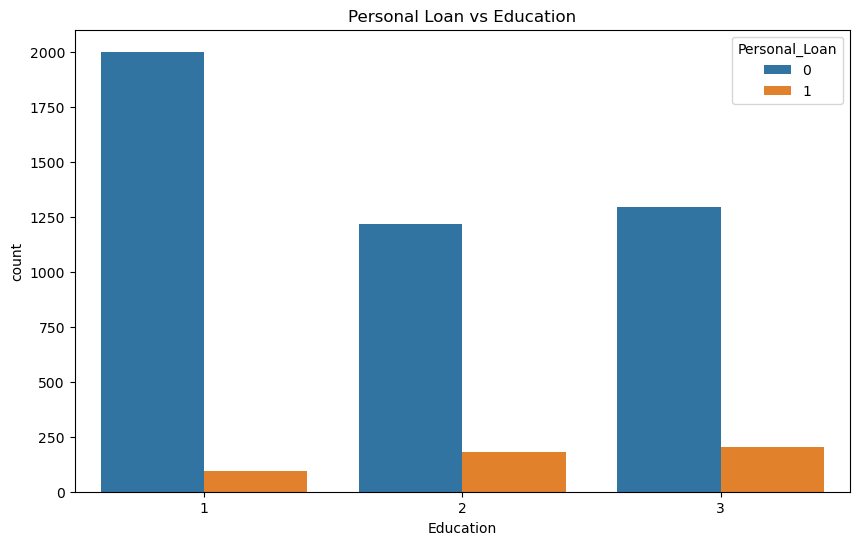

In [299]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Education", hue="Personal_Loan")
plt.title("Personal Loan vs Education")
plt.show()



 Insight:
* Customers with higher education levels (graduate and advanced/professional)
* are more likely to be interested in personal loans compared to those with
* undergraduate degrees. This could be attributed to higher income levels
* and better financial understanding among those with advanced education.






## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

In [306]:
# prompt: lets start  modeling for decision tree with using sklearn  default first  drop ID and Personal_Loan

# Separating target variable and other variables
X = data.drop(["ID", "Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Creating a decision tree classifier
dt = DecisionTreeClassifier(random_state=1)

# Fitting the decision tree classifier on the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [307]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (3500, 12)
Shape of test set: (1500, 12) 

Percentage of classes in training set:
Personal_Loan
0    90.771429
1     9.228571
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    89.533333
1    10.466667
Name: proportion, dtype: float64


### Model Evaluation Criterion

**Decision Tree (sklearn default)**

In [310]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

*


### Model Evaluation

In [313]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [314]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

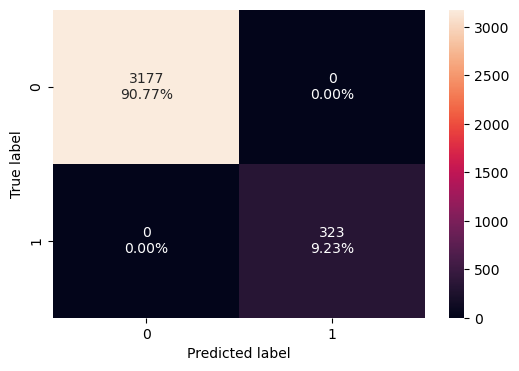

In [315]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [316]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


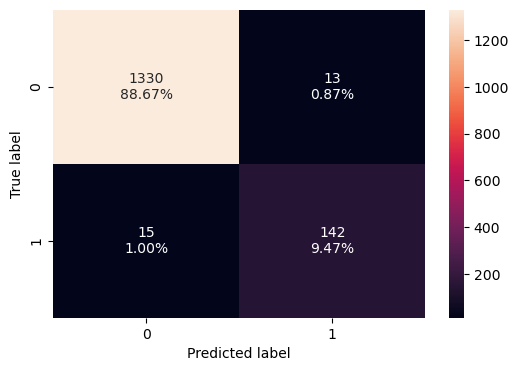

In [317]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [318]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.981333,0.904459,0.916129,0.910256


 Observations:
* The decision tree model is overfitting the training data, as evidenced by perfect scores on the training set.
* This indicates it has likely memorized the training data and may not generalize well to unseen data.
*The performance on the test set is good, but there's room for improvement.
* The model is better at predicting 'No' (correctly identifying those who didn't take a loan) than 'Yes'.






**Visualizing the Decision Tree**

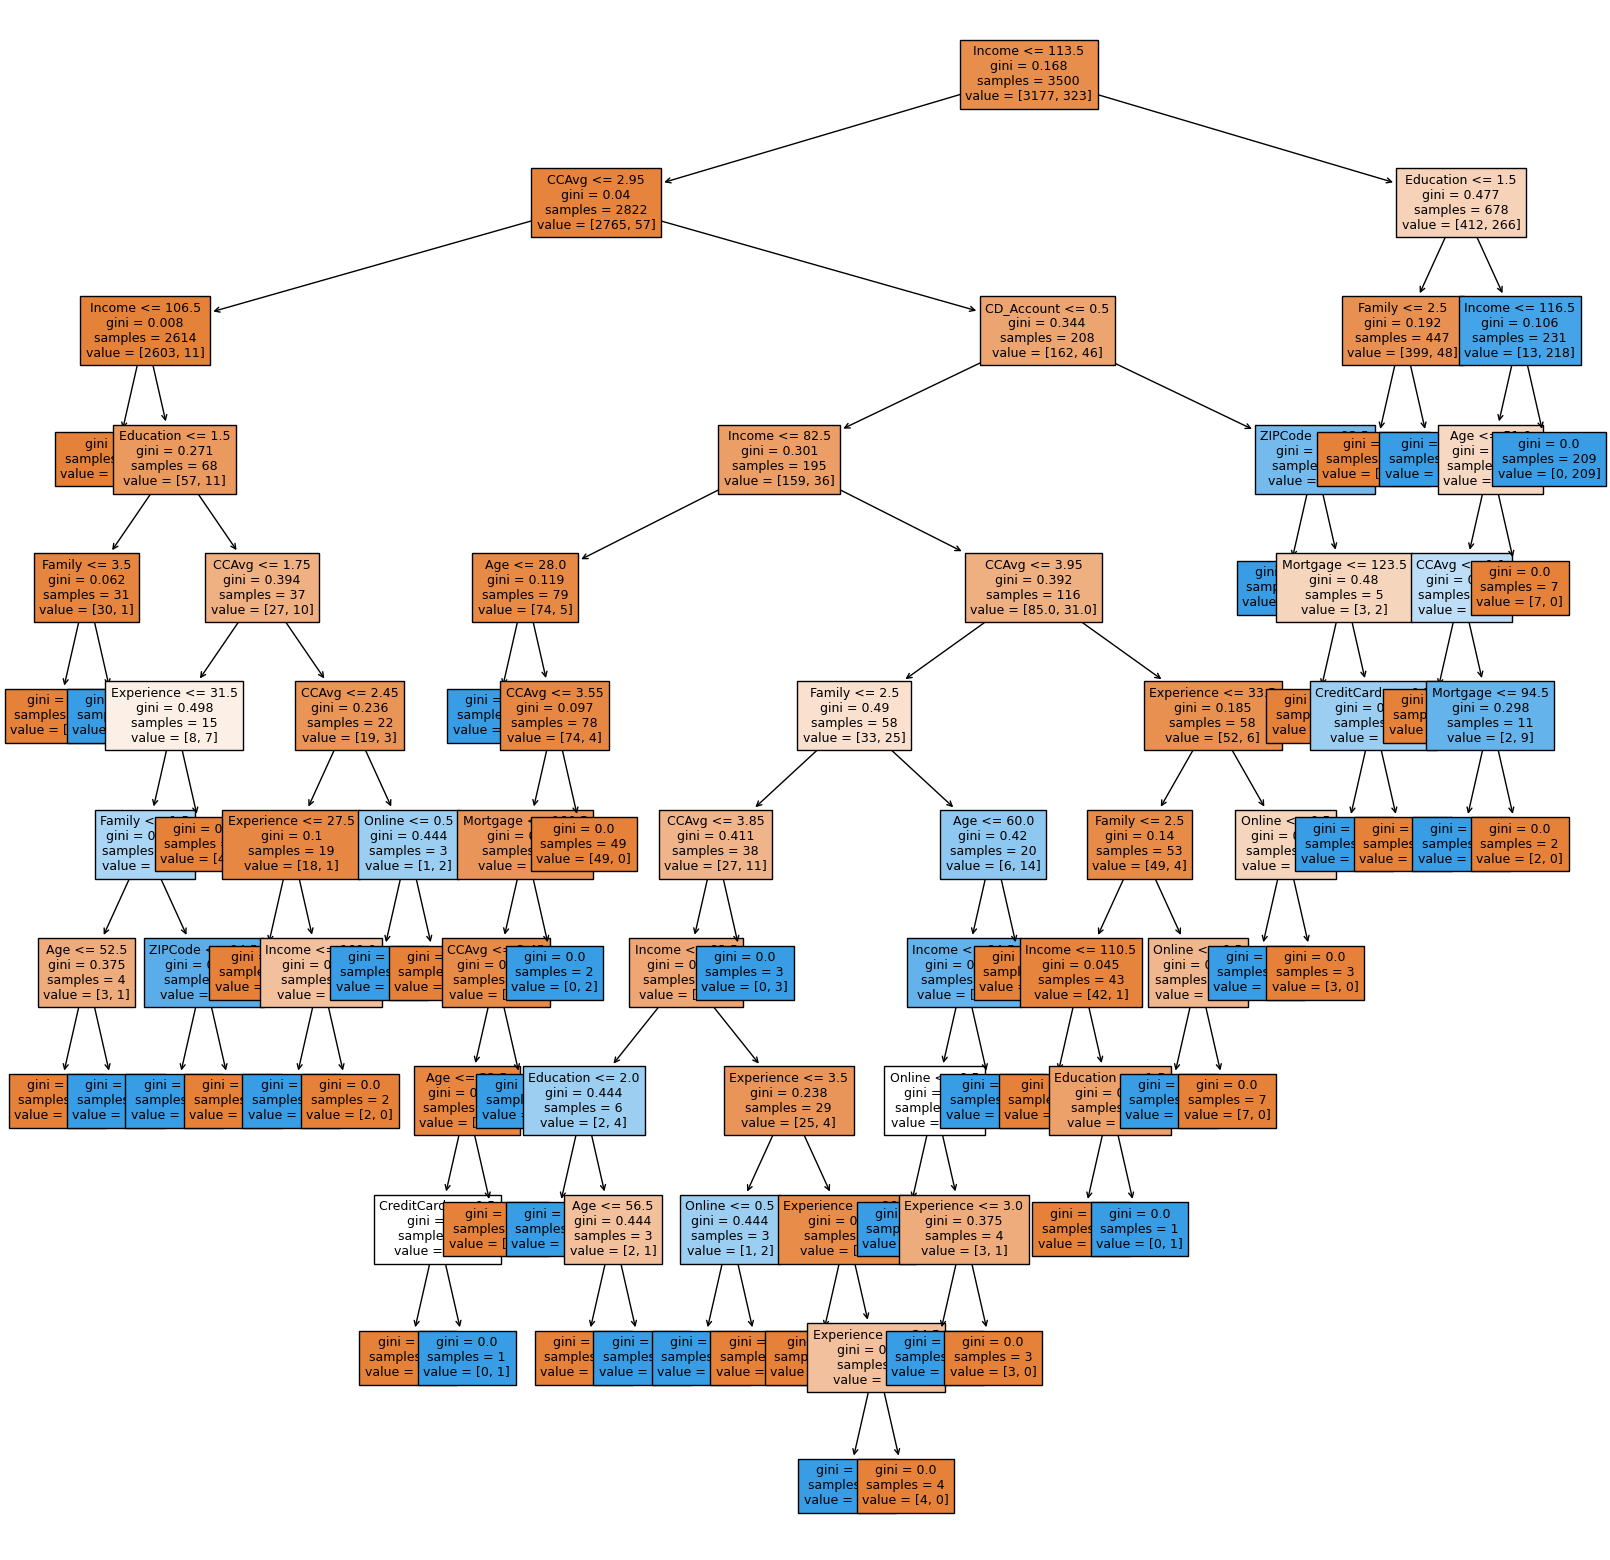

In [321]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

* We can observe that this is a very complex tree.





In [327]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [30.00, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |--- Experience <= 31.50
|   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |--- Age <= 52.50
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  52.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |   |--- ZIPCode <= 94.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |   |   |--- ZIPCode >  94.50
|   |   |   |   |   |   |









Decision Tree (Pre-pruning)

In [330]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [332]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20, min_samples_split=30,
                       random_state=42)

**Model Evaluation**

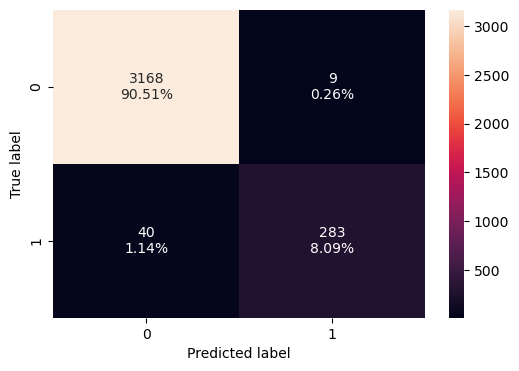

In [336]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [340]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.876161,0.969178,0.920325


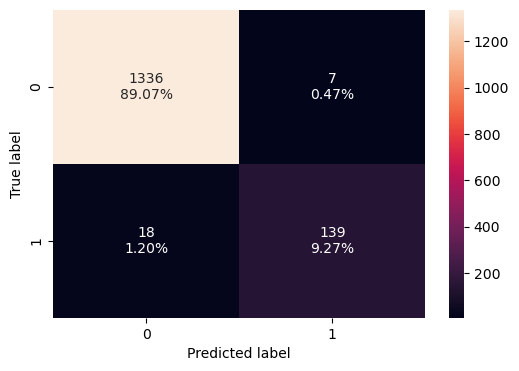

In [343]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [346]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.983333,0.88535,0.952055,0.917492


* The training and test scores are very close to each other, indicating a generalized performance.

**Visualizing the Decision Tree**

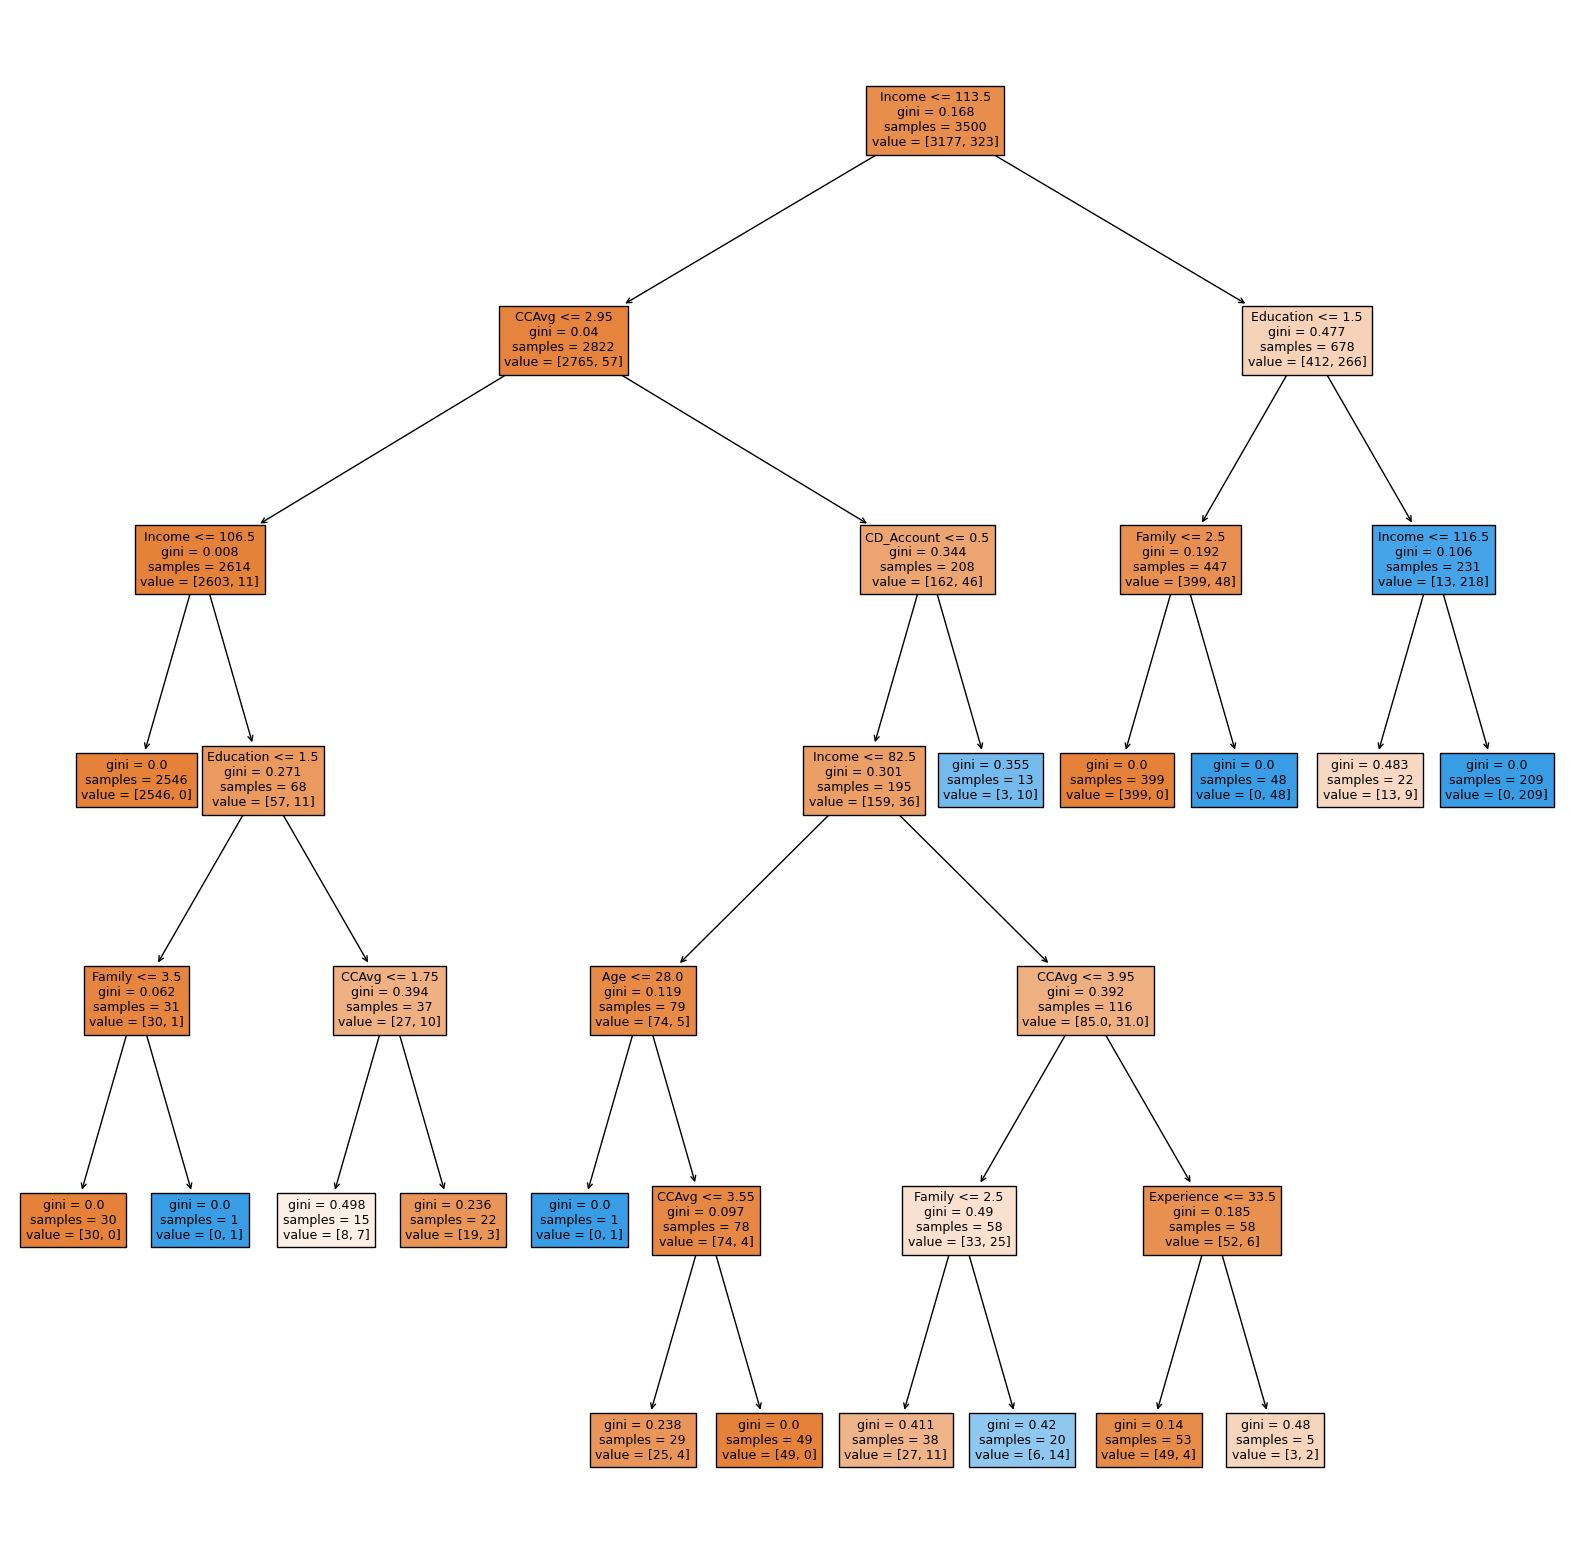

In [350]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

*  This is a far less complex tree than the previous one.
*   We can observe the decision rules much more clearly in the plot.





In [352]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [30.00, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |--- weights: [8.00, 7.00] class: 0
|   |   |   |   |--- CCAvg >  1.75
|   |   |   |   |   |--- weights: [19.00, 3.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- Age <= 28.00
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  28.00
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- weights: [25.00, 4.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |   |--- weights: [49.00, 0.00] cla

**Decision Tree (Post-pruning)**

In [355]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [356]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000271,0.000541
2,0.000275,0.001091
3,0.000279,0.001649
4,0.000343,0.002335
5,0.000381,0.002716
6,0.000381,0.003478
7,0.000381,0.003858
8,0.000429,0.004287
9,0.000429,0.005144


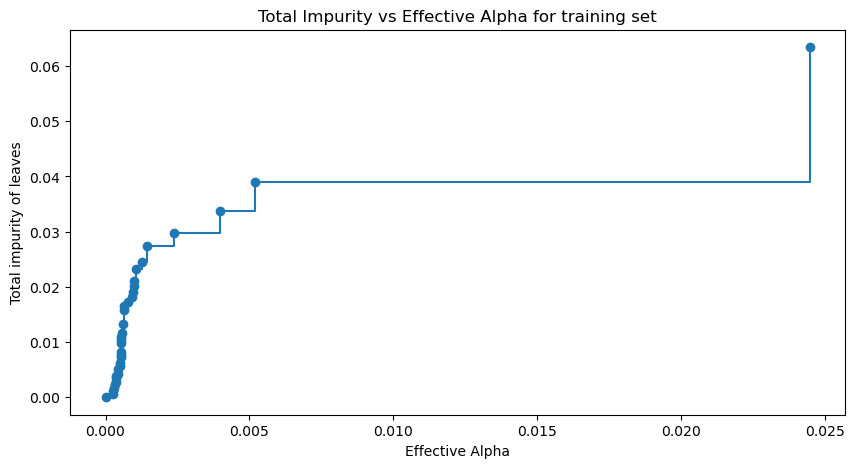

In [358]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");


*Next, we train a decision tree using the effective alphas.


* The last value in `ccp_alphas` is the alpha value that prunes the whole tree,
leaving the corresponding tree with one node.





In [360]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.05206542558865251


*  Moving ahead, we remove the last element in
`clfs`` and ``ccp_alphas`` as it corresponds to a trivial tree with only one
node.

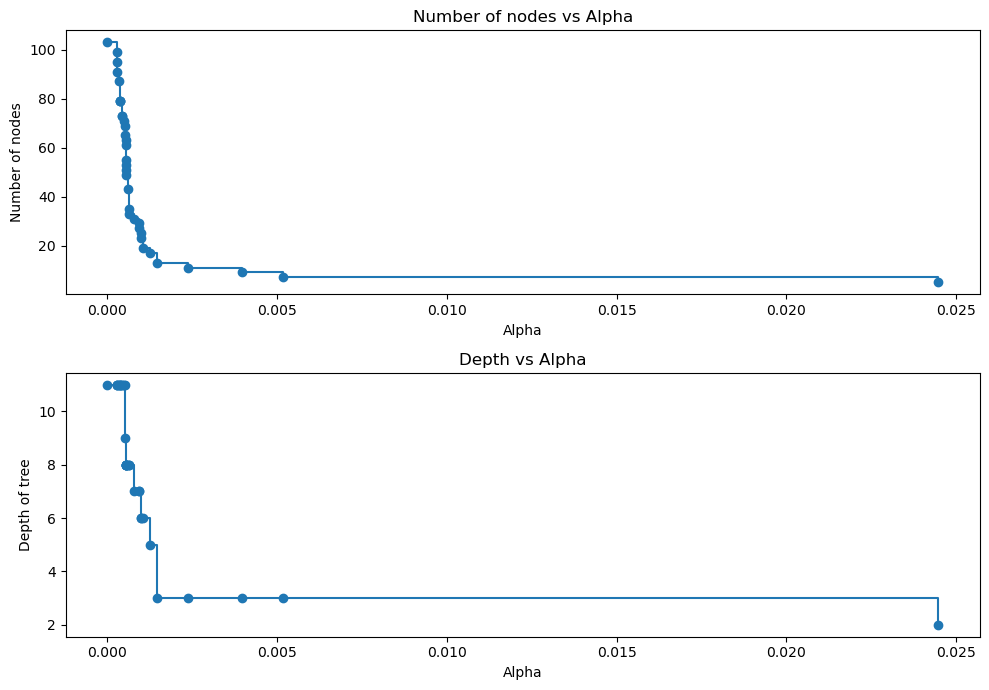

In [362]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [363]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [364]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

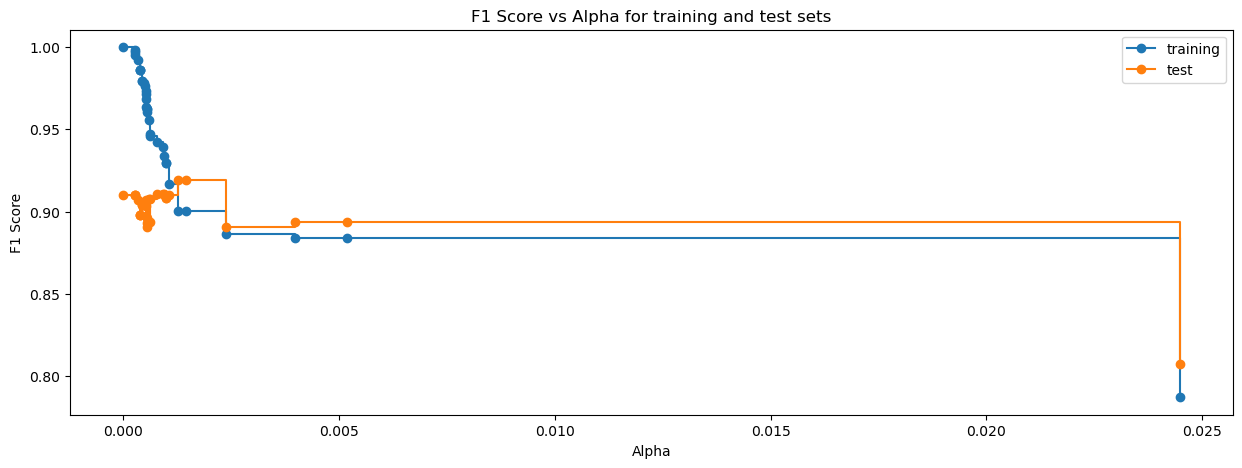

In [365]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

**Model Evaluation**

In [367]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.001261913404200155, random_state=42)


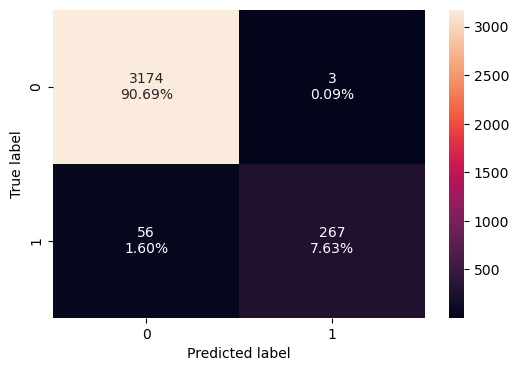

In [368]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [371]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.983143,0.826625,0.988889,0.900506


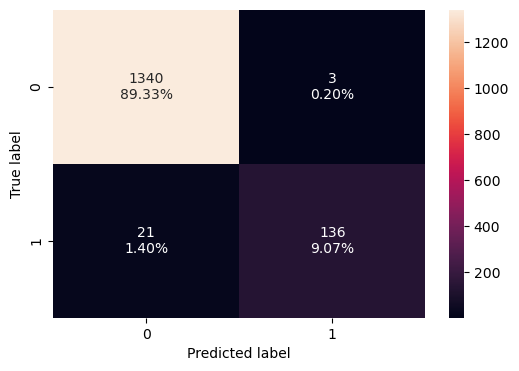

In [373]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [374]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.984,0.866242,0.978417,0.918919





*   The differnces are very small showing generalized performance.




**Visualizing Decision Tree**

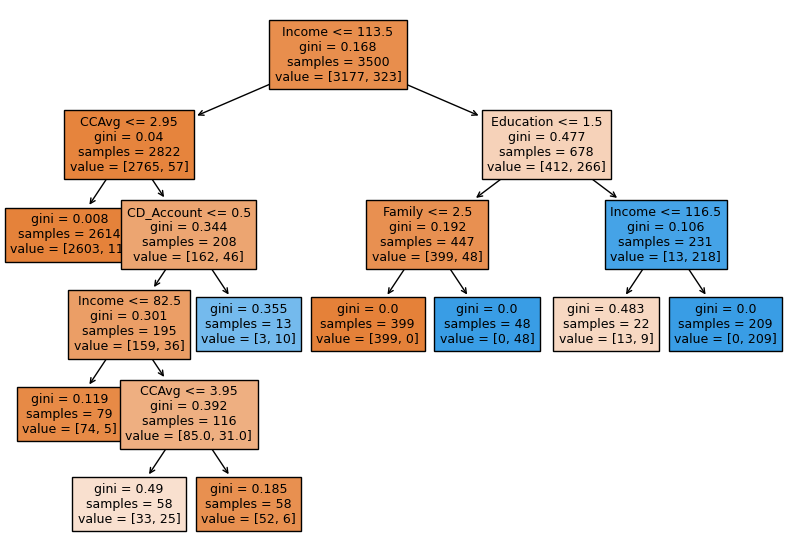

In [377]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()



  *This tree is less complex than the pre-pruned tree.
  * We can observe the decision rules much more clearly in the plot.









In [379]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)




|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2603.00, 11.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [74.00, 5.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |--- weights: [33.00, 25.00] class: 0
|   |   |   |   |--- CCAvg >  3.95
|   |   |   |   |   |--- weights: [52.00, 6.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [399.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 48.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.00, 9.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 209.00] class: 1



**Model Performance Comparison and Final Model Selection**

In [381]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.986000,0.983143
Recall,1.0,0.876161,0.826625
Precision,1.0,0.969178,0.988889
F1,1.0,0.920325,0.900506


In [382]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.981333,0.983333,0.984000
Recall,0.904459,0.885350,0.866242
Precision,0.916129,0.952055,0.978417
F1,0.910256,0.917492,0.918919


  Observations:

 **Pre-pruning:**
 * Directly restricts the tree's complexity during training by setting limits on depth, number of leaf nodes, or minimum samples per split.
* Helps prevent overfitting by stopping the tree from growing too complex and memorizing the training data.
* Can be faster than post-pruning as it avoids building a fully grown tree.
 * Requires careful selection of hyperparameters (e.g., max_depth) to balance bias and variance.

  **Post-pruning:**
 * Grows a full decision tree and then removes or collapses nodes based on a cost-complexity criterion.
 * Uses techniques like cost-complexity pruning to find the optimal tree size that minimizes overfitting.
 * Often provides a better balance between bias and variance compared to pre-pruning.
 * Can be more computationally expensive as it involves building a complete tree before pruning.

 In this specific case:
 * Both pre-pruning and post-pruning improved the model's generalization performance compared to the default decision tree.
* The post-pruned tree achieved slightly better test performance and a simpler tree structure, suggesting it might be the preferred choice in this scenario.

 Ultimately, the choice between pre-pruning and post-pruning depends on factors like the dataset size, computational resources, and desired level of model complexity.

**Feature Importance**

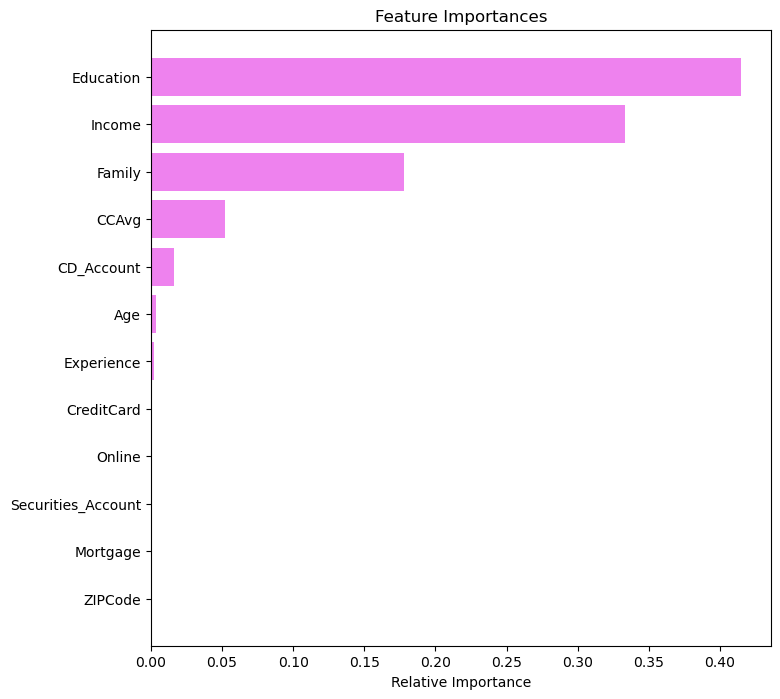

In [385]:
# importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Current Education and Income are the most influential attributes in buying Peronal Loan.
* Family and CCAvg are the next best attributes to consider





**Predicting on a single data point**

In [438]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
Personal_Loan_prediction = dtree3.predict(applicant_details)

print(Personal_Loan_prediction)

[0]
CPU times: total: 0 ns
Wall time: 3.93 ms


In [442]:
# making a prediction
approval_likelihood = dtree3.predict_proba(applicant_details)

print(approval_likelihood[0])

[0.99579189 0.00420811]


## Actionable Insights and Business Recommendations


###Final busination insights and recommendation

   **Targeted Marketing Campaigns:**
 - Focus marketing efforts on individuals with higher levels of education and income, as they are more likely to be interested in personal loans.
 - Tailor messaging to emphasize the benefits of personal loans for specific educational or financial goals.

  **Product Development:**
 - Consider offering specialized loan products tailored to the needs of individuals with different educational backgrounds and income levels.
 - Explore options for flexible repayment terms and competitive interest rates to attract a wider range of borrowers.

  **Credit Risk Assessment:**
 - Leverage the insights on feature importance to refine credit risk assessment models.
 - Pay particular attention to variables like education, income, family size, and credit card spending when evaluating loan applications.

  **Customer Relationship Management:**
 - Implement personalized communication strategies based on customer profiles.
 - Proactively engage with existing customers who exhibit characteristics similar to those who have taken personal loans in the past.

  **Continuous Monitoring and Optimization:**
 - Regularly monitor model performance and update it as needed to reflect changing market dynamics and customer behavior.
 - Conduct A/B testing to evaluate the effectiveness of different marketing messages and loan offerings.

* What recommedations would you suggest to the bank?

___